In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

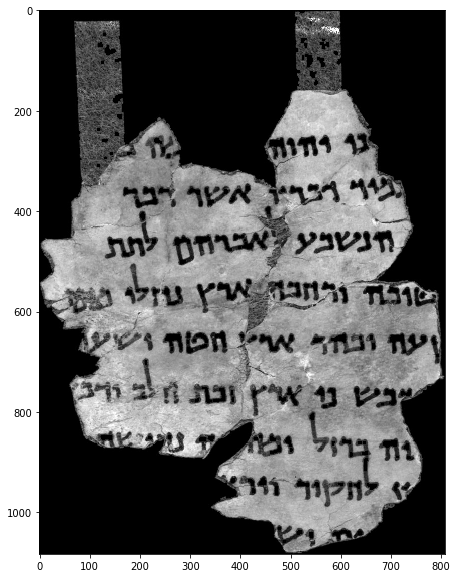

In [2]:
path = 'image-output/test7_extracted.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [3]:
_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [4]:
image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


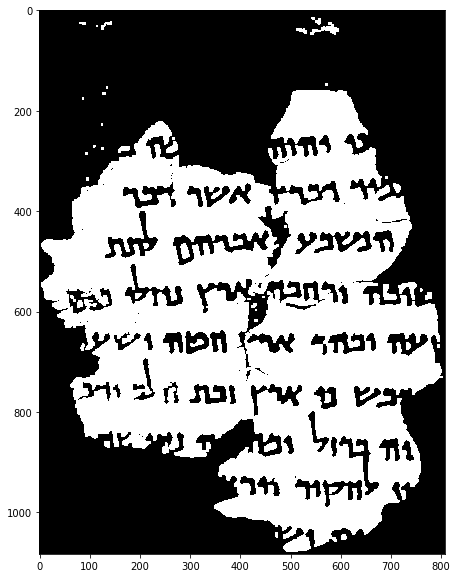

In [5]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [6]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin
centroids

array([[  426.67106322,   614.67149163],
       [  378.93422194,   462.91168871],
       [  583.        ,    33.        ],
       [  581.        ,   167.        ],
       [  570.61403509,   264.42105263],
       [  494.8       ,   298.2       ],
       [  499.        ,   296.        ],
       [  490.5       ,   300.5       ],
       [  262.66666667,   307.16666667],
       [  482.52380952,   303.04761905],
       [  144.875     ,   316.625     ],
       [  265.33333333,   325.33333333],
       [  263.        ,   329.        ],
       [  263.        ,   335.75      ],
       [  220.72138421,   368.11357587],
       [  401.53650442,   366.57300885],
       [  128.        ,   346.25      ],
       [  312.34049587,   367.72066116],
       [  350.33235294,   367.64117647],
       [   96.        ,   359.        ],
       [  607.        ,   385.75      ],
       [  471.30519481,   444.04750513],
       [  187.19686721,   461.2253471 ],
       [  671.15384615,   417.53846154],
       [  110.  

In [7]:
n_labels

98

In [8]:
stats

array([[     3,     13,    801,   1067, 385150],
       [     0,      0,    808,   1083, 427635],
       [   583,     33,      1,      1,      1],
       [   576,    167,     11,      1,     11],
       [   557,    249,     25,     35,    456],
       [   493,    297,      4,      3,      5],
       [   499,    296,      1,      1,      1],
       [   490,    300,      2,      2,      2],
       [   261,    302,      5,      9,     18],
       [   477,    302,     12,      5,     21],
       [   144,    315,      3,      4,      8],
       [   265,    325,      2,      2,      3],
       [   263,    329,      1,      1,      1],
       [   262,    335,      3,      2,      4],
       [   167,    343,    105,     52,   2254],
       [   378,    345,     44,     41,    904],
       [   127,    346,      3,      2,      4],
       [   294,    350,     33,     43,    605],
       [   328,    351,     53,     42,   1020],
       [    96,    359,      1,      1,      1],
       [   606,    3

In [9]:
min_thresh = 400
max_thresh = 3000
boxes = []
box_centroids = []
for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        boxes.append(stats[i])
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

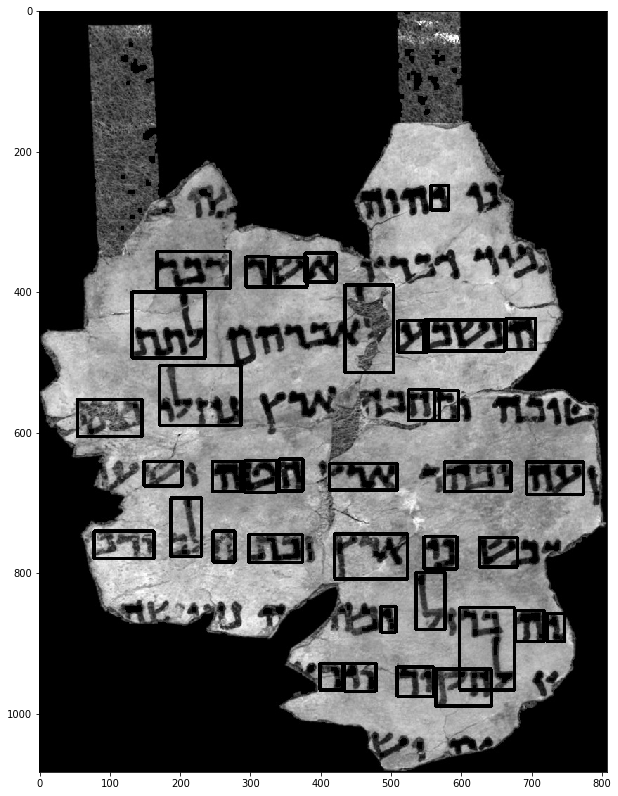

In [10]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [11]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [12]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N

avg_height *= 1

In [13]:
avg_width

60.081081081081081

In [14]:
avg_height

52.270270270270274

In [15]:
word_lines = []
line = []
# add first box to first line
line.append(boxes.pop(0))
previous_centroid = box_centroids[0][1]
box_centroids.pop(0)
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box_centroids[i][1]
    if(centroid_y >= (previous_centroid - avg_height) and (centroid_y <= previous_centroid + avg_height)):
        line.append(box)
        previous_centroid = centroid_y
    else:
        #if not, add the line to the collection of lines and start a new one
        if(line != []):
            word_lines.append(line)
            line = []
            previous_centroid = centroid_y
            line.append(box)
    
    
    
    

In [16]:
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
height,width = image.shape
print(word_lines)

[[array([557, 249,  25,  35, 456], dtype=int32)], [array([ 167,  343,  105,   52, 2254], dtype=int32), array([378, 345,  44,  41, 904], dtype=int32), array([294, 350,  33,  43, 605], dtype=int32), array([ 328,  351,   53,   42, 1020], dtype=int32)], [array([ 435,  390,   69,  125, 2926], dtype=int32), array([ 132,  400,  104,   94, 2809], dtype=int32), array([ 664,  438,   42,   44, 1003], dtype=int32), array([510, 441,  43,  45, 816], dtype=int32), array([ 547,  440,  115,   44, 2435], dtype=int32)], [array([ 171,  505,  116,   85, 2631], dtype=int32), array([525, 539,  44,  44, 815], dtype=int32), array([562, 540,  34,  43, 595], dtype=int32), array([  54,  553,   92,   53, 1941], dtype=int32)], [array([341, 638,  34,  45, 939], dtype=int32), array([149, 641,  54,  35, 665], dtype=int32), array([ 246,  641,   41,   43, 1015], dtype=int32), array([ 291,  640,   47,   45, 1309], dtype=int32), array([ 576,  642,   95,   42, 1985], dtype=int32), array([ 693,  642,   81,   46, 1916], dtyp

In [17]:
line_image = np.array(image)

In [18]:
#save strips
strips = []
# draw lines for the first strip
for line in word_lines:
    min_height = 99999
    max_height = 0
    for box in line:
        if(box[1] < min_height):
            min_height = box[1]
        if(box[1] + box[3]  > max_height):
            max_height = box[1] + box[3] 
    cv2.line(line_image,(0,min_height),(width, min_height),(0,200,0),3)   
    strips.append([min_height, max_height])
   


        
print(min_height)
print(max_height)
cv2.line(line_image,(0,max_height),(width, max_height),(0,200,0),3) 

799
966


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

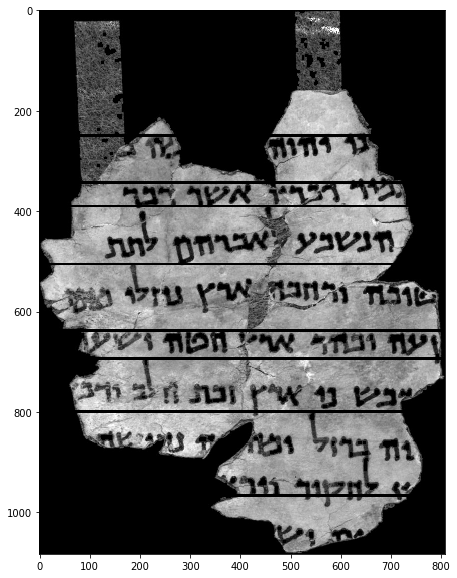

In [19]:
plt.figure(figsize = (500,10))
plt.imshow(line_image, cmap='gray', aspect = 1)
plt.show()

505 606


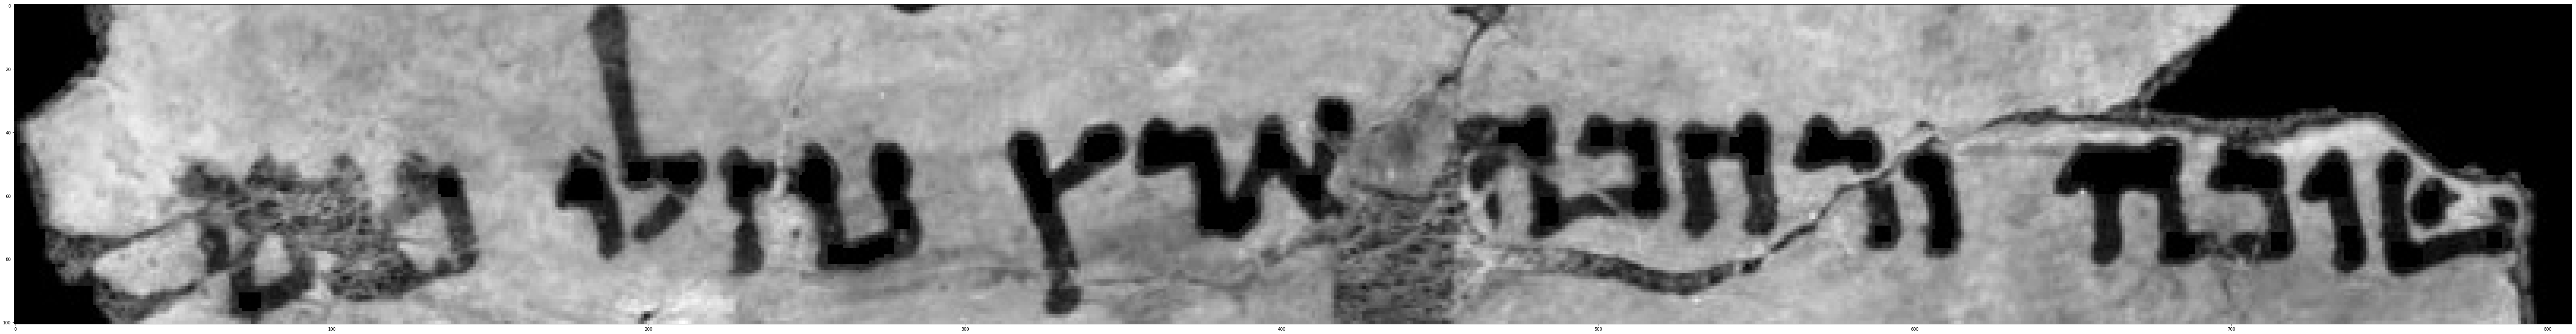

In [58]:
[y1, y2] = strips[3] 

strip_img = image[y1:y2, 0:width]
print(y1,y2)
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

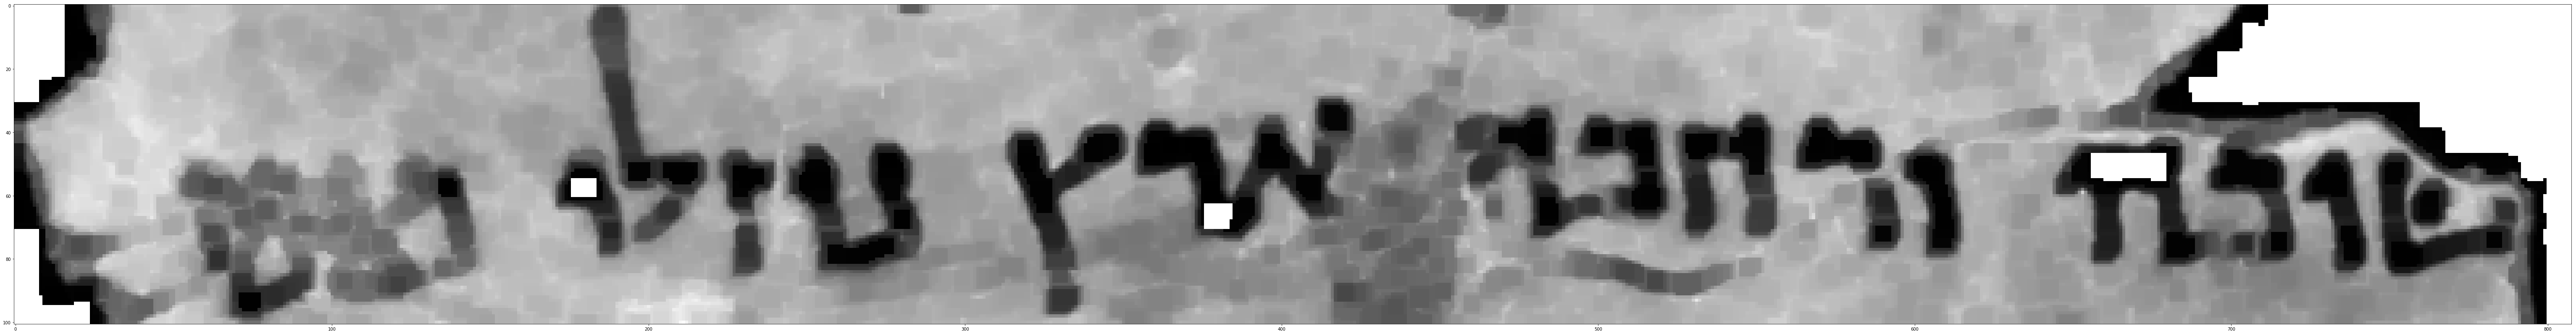

In [59]:
strip_img = cv2.morphologyEx(strip_img, cv2.MORPH_CLOSE, kernel)
#strip_img = cv2.GaussianBlur(strip_img, (5,5) , 0)
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)
n_labels
mx = 0
background_index = 0
"""for i in range(len(stats)):
    if(stats[i][0] == 0 and stats[i][1] == 0):
        background_index = i
background = stats[background_index]

height, width = strip_img.shape
for i in range(height):
    for j in range(width):
        if(labels[i][j] == background_index):
            strip_img[i][j] = 255
"""

strip_img[strip_img == 0] = 255

plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [60]:
strip_img = 255 - strip_img

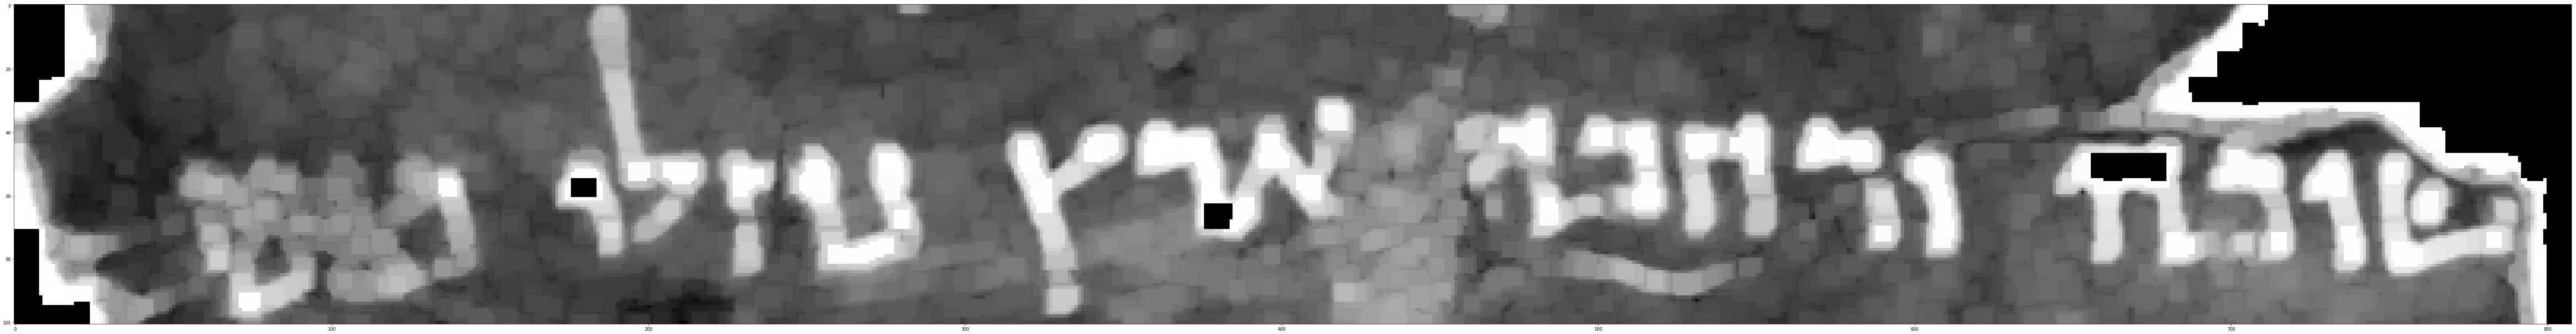

In [61]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [62]:
strip_img = cv2.dilate(strip_img,kernel,iterations = 1)
strip_img = cv2.GaussianBlur(strip_img, (9,9), 0)
_, strip_img = cv2.threshold(strip_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)



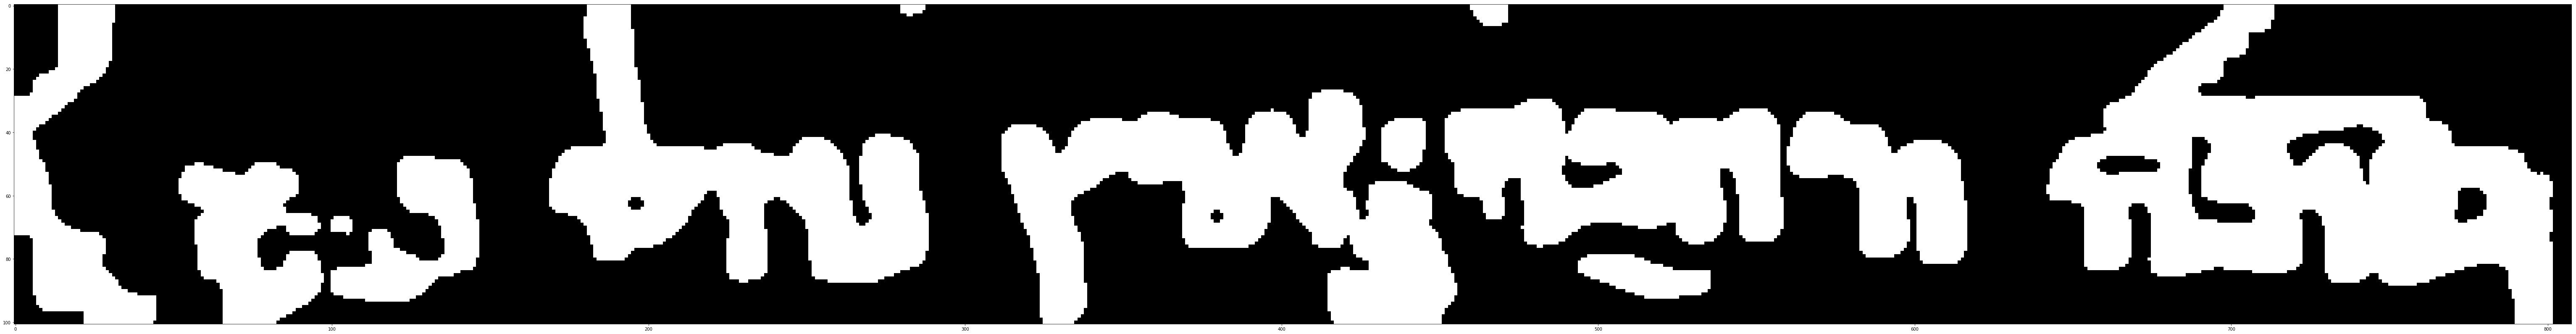

In [63]:
plt.figure(figsize = (500,14))
plt.imshow(strip_img, cmap='gray', aspect = 1)
plt.show()

In [64]:
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(strip_img, 8, cv2.CV_32S)

In [65]:
n_labels

14

In [66]:
stats

array([[    0,     0,   808,   101, 54144],
       [    0,     0,    45,   101,  1777],
       [  169,     0,   120,    88,  4314],
       [  280,     0,     8,     4,    25],
       [  460,     0,    12,     7,    71],
       [  642,     0,   160,   101,  7671],
       [  312,    27,   144,    74,  5167],
       [  452,    30,   107,    47,  3595],
       [  560,    34,    57,    48,  1612],
       [  432,    36,    14,    17,   206],
       [  100,    48,    47,    46,  1087],
       [   52,    50,    46,    51,  1515],
       [  100,    67,     7,     6,    34],
       [  494,    79,    42,    14,   390]], dtype=int32)

In [79]:
idx = 2

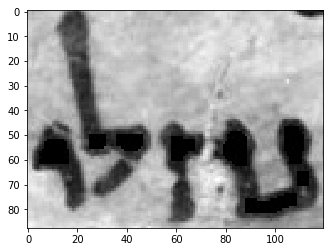

In [80]:
strip_img = image[y1:y2, 0:width]
plt.figure(figsize = (500,4))
plt.imshow(strip_img[stats[idx][1]:stats[idx][1]+stats[idx][3], stats[idx][0]:stats[idx][0]+stats[idx][2]], cmap='gray', aspect = 1)
plt.show()